# Non Linear DataSet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Creating Dataset
from sklearn.datasets import make_moons

In [2]:
x,y=make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=2)

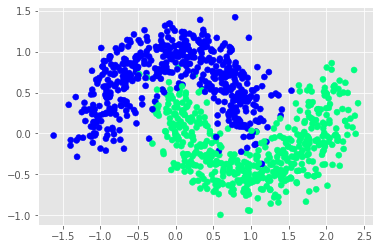

In [3]:
plt.style.use('ggplot')
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.winter)
plt.show()

In [4]:
def activation(z):
    return (1.0)/(1+np.exp(-z))
def cal_process_output(wt,x_data):
    z=np.dot(x_data,wt)
    sig_z = activation(z)
    return sig_z
def cal_loss(x,y,wt):
    #Binary Cross entropy : Log Loss
    y_hat = cal_process_output(wt,x)
    LL = np.mean(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))
    return LL
def update_values(x,y,wt,lr):
    y_hat=cal_process_output(wt,x)
    prod = np.dot(x.T,y_hat-y)
    no = x.shape[0]
    wt = wt - lr*prod/float(no)
    return wt
def train(x,y,lr=0.5,epoch=100):
    # add a x0 column to handle bias where bias is always 1
    ones = np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    
    wt = np.zeros(x.shape[1])
    
    for e in range(epoch):
        wt =update_values(x,y,wt,lr)
        if e%100==0:
            cur_l = cal_loss(x,y,wt)
            print("Loss at epoch ",e," is: ",cur_l)
    return wt
w=train(x,y,epoch=10000)
print(w)

Loss at epoch  0  is:  0.6450017370090052
Loss at epoch  100  is:  0.30228843675106126
Loss at epoch  200  is:  0.28768013114311275
Loss at epoch  300  is:  0.28393802620728636
Loss at epoch  400  is:  0.2827032230561087
Loss at epoch  500  is:  0.28224358061937793
Loss at epoch  600  is:  0.2820608316229005
Loss at epoch  700  is:  0.28198529653736853
Loss at epoch  800  is:  0.2819533201786177
Loss at epoch  900  is:  0.28193957706179207
Loss at epoch  1000  is:  0.2819336125233809
Loss at epoch  1100  is:  0.2819310074109392
Loss at epoch  1200  is:  0.2819298648352523
Loss at epoch  1300  is:  0.2819293623360203
Loss at epoch  1400  is:  0.2819291409380494
Loss at epoch  1500  is:  0.28192904327424434
Loss at epoch  1600  is:  0.2819290001581235
Loss at epoch  1700  is:  0.28192898111336745
Loss at epoch  1800  is:  0.2819289726981816
Loss at epoch  1900  is:  0.28192896897894876
Loss at epoch  2000  is:  0.28192896733491635
Loss at epoch  2100  is:  0.28192896660812083
Loss at epo

In [5]:
def get_all_pred(x_test,wt,out=True):
    if(x_test.shape[1]!=wt.shape[0]):
        temp=np.ones((x_test.shape[0],1))
        x_test=np.hstack((temp,x_test))
    prob = cal_process_output(wt,x_test)
    if not out:
        return prob
    else:
        out = np.zeros(prob.shape)
        out[prob>=5]=1
        return out

In [6]:
x1=np.linspace(-2,4,120)
x2= -(w[0]+w[1]*x1)/w[2]

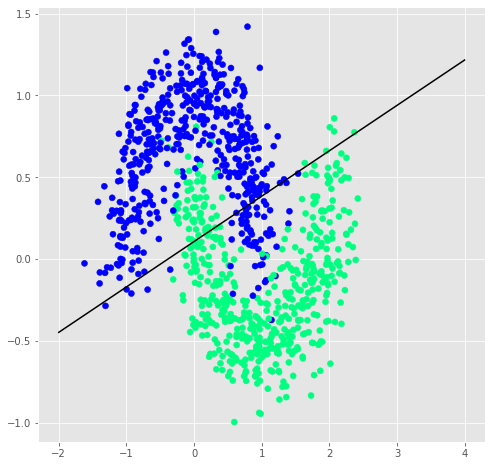

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.winter)
plt.plot(x1,x2,color="black")
plt.show()

In [8]:
y_hat = get_all_pred(x,w)

In [9]:
np.sum(y_hat==y)/y.shape[0] * 100

50.0